In [2]:
from music21 import *

In [3]:
with open('environment.txt') as f:
    env = f.readlines()
# you may also want to remove whitespace characters like \n at the end of each line
env = [x.strip() for x in env]

# this is what gets .show() to work
us = environment.UserSettings()
us['musicxmlPath'] = env[0]
us['musescoreDirectPNGPath'] = env[0]

In [ ]:
# Converting music21 stream to xml

# SX = musicxml.m21ToXml.ScoreExporter(bd[5].parse())
# print(type(SX.parse()))
# b = SX.parse()

# print(type(b))

# with open('out.xml','wb') as f:
#     f.write(xml.etree.ElementTree.tostring(b))

# #for s in bd:
# #    SX = musicxml.m21ToXml.ScoreExporter(s.parse())
# #    print(type(SX.dump(SX.parse())))
    

In [10]:
import re
import xml

bachRegex = re.compile(r'.*bwv.*', re.IGNORECASE)
bd = corpus.search(bachRegex)

score = bd[5].parse()

chords = score.chordify()
chords.show("text")

{0.0} <music21.metadata.Metadata object at 0x7f33de09e4a8>
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of A major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord A4 E4 C#4 A2>
    {0.5} <music21.chord.Chord B4 E4 D4 A2>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.chord.Chord C#5 A4 E4 A3>
    {0.5} <music21.chord.Chord C#5 A4 E4 G#3>
    {1.0} <music21.chord.Chord D5 A4 F#4 F#3>
    {2.0} <music21.chord.Chord E5 G#4 B3 E3>
    {2.5} <music21.chord.Chord E5 G#4 C#4 E3>
    {3.0} <music21.chord.Chord D5 F#4 D4 B2>
    {3.5} <music21.chord.Chord D5 G#4 D4 B2>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.chord.Chord C#5 A4 E4 C#3>
    {0.5} <music21.chord.Chord C#5 A4 E4 D3>
    {1.0} <music21.chord.Chord B4 G#4 E4 E3>
    {2.0} <music21.chord.Chord C#5 A4 E4 A2>
    {3.0} <music21.chord.Chord C#5 E4 A3>
    {3.5} <music21.chord.Chord C#5 E4 A3 G#3>
{9.0} <music21

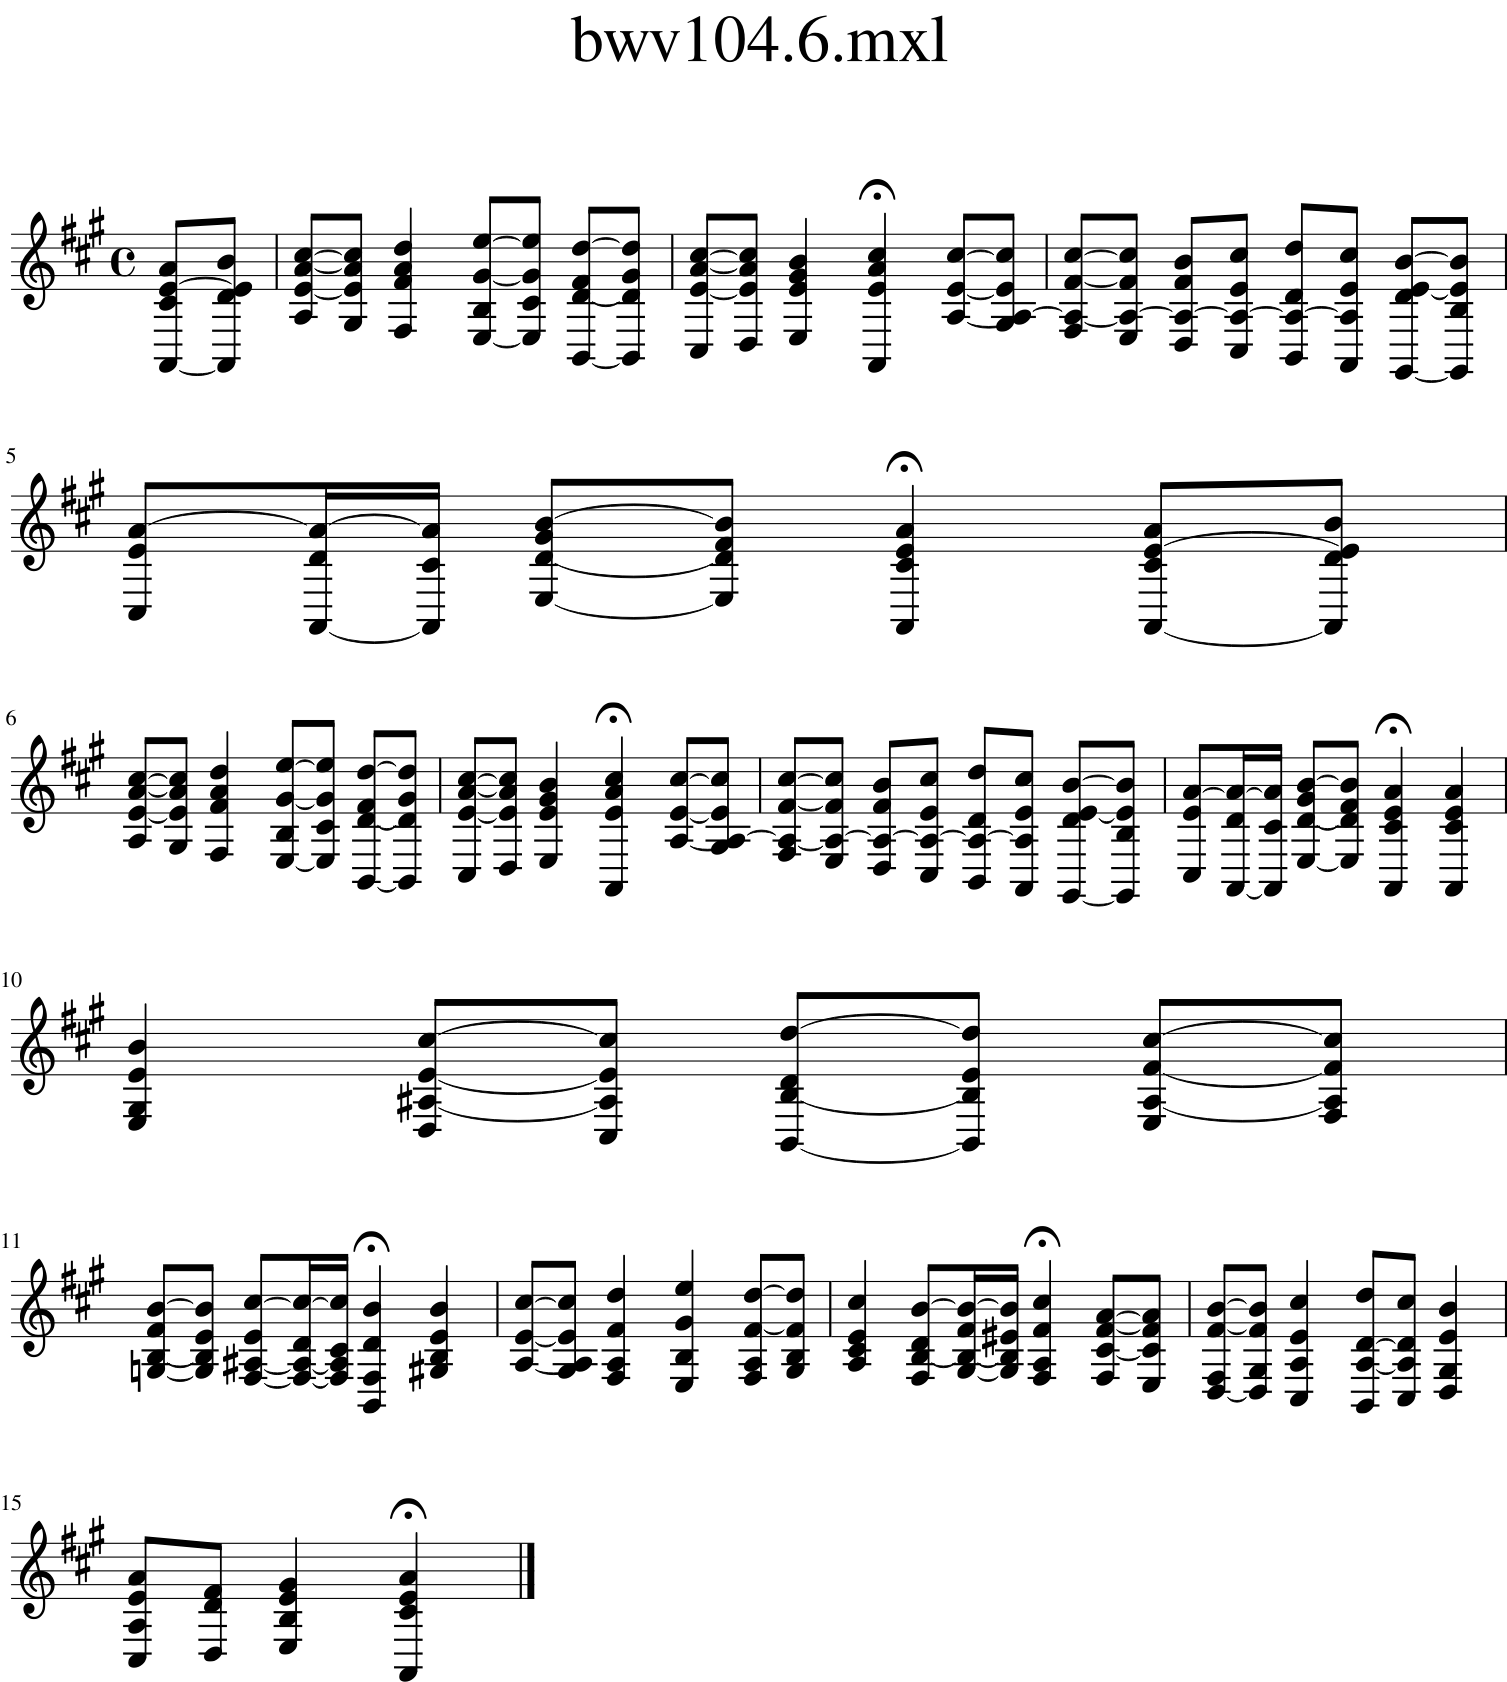

In [11]:
chords.show()

In [55]:
import pandas as pd

def convertSongToDataFrame(song):
    df = pd.DataFrame()
    
    currentKeySignature = None
    currentTimeSignature = None
    for measure in song.measures(0, None, collect=('TimeSignature','KeySignature')):
        if measure.keySignature:
            currentKeySignature = measure.keySignature
        if measure.timeSignature:
            currentTimeSignature = measure.timeSignature.ratioString
        for i in measure.iter:
            if type(i) is chord.Chord:
                df2 = pd.DataFrame([currentKeySignature, currentTimeSignature, roman.romanNumeralFromChord(i, currentKeySignature).figure, i.duration.quarterLength, i.offset + measure.offset])
                df = df.append(df2[0], ignore_index = True)
    return df

          0    1         2     3      4
0   A major  4/4         I  0.50   0.00
1   A major  4/4     ii542  0.50   0.50
2   A major  4/4         I  0.50   1.00
3   A major  4/4       I42  0.50   1.50
4   A major  4/4       IV6  1.00   2.00
5   A major  4/4         V  0.50   3.00
6   A major  4/4      iii6  0.50   3.50
7   A major  4/4        ii  0.50   4.00
8   A major  4/4     viio6  0.50   4.50
9   A major  4/4        I6  0.50   5.00
10  A major  4/4      I752  0.50   5.50
11  A major  4/4         V  1.00   6.00
12  A major  4/4         I  1.00   7.00
13  A major  4/4         I  0.50   8.00
14  A major  4/4       I42  0.50   8.50
15  A major  4/4        vi  0.50   9.00
16  A major  4/4      vi42  0.50   9.50
17  A major  4/4      ii65  0.50  10.00
18  A major  4/4        I6  0.50  10.50
19  A major  4/4       ii7  0.50  11.00
20  A major  4/4         I  0.50  11.50
21  A major  4/4       V65  0.50  12.00
22  A major  4/4        V6  0.50  12.50
23  A major  4/4        I6  0.50  13.00
